In [1]:
import math
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv("smallsample.csv", encoding = 'utf-8')
# features = ['Gender','Reality','wkphone']  with this it works 
features = ['Gender','Reality','ChldNo_1', 'ChldNo_2More','wkphone',
              'gp_Age_high', 'gp_Age_highest', 'gp_Age_medium',
       'gp_Age_lowest','gp_worktm_high', 'gp_worktm_highest',
       'gp_worktm_low', 'gp_worktm_medium','occyp_hightecwk', 
              'occyp_Laborwk','famsizegp_1', 'famsizegp_3more',
       'houtp_Co-op apartment', 'houtp_Municipal apartment',
       'houtp_Office apartment', 'houtp_Rented apartment',
       'houtp_With parents','edutp_Higher education',
       'edutp_Incomplete higher', 'edutp_Lower secondary','famtp_Civil marriage',
       'famtp_Separated','famtp_Single / not married','famtp_Widow'] 

nb_train = int(np.floor(0.9 * len(df)))
df = df.sample(frac=1, random_state=217)
X_train = df[features][:nb_train]
y_train = pd.DataFrame(df['target'][:nb_train].values)
X_test = df[features][nb_train:]
y_test = pd.DataFrame(df['target'][nb_train:].values)

In [3]:
import itertools # we will use this library tools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues): # choosing blue theme for the graph
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # calculating the outlining indicators 
        
    print(cm) # printing the confusion matrix
    # designing the graph:
    plt.imshow(cm, interpolation='nearest', cmap=cmap) # will be displaying data as 2D image
    plt.title(title) # adding title
    plt.colorbar() # adding colorbar
    # setting tick marks:
    tick_marks = np.arange(len(classes)) 
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    # editing the indicators representation on the graph:
    fmt = '.2f' if normalize else 'd' # setting the data type
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),                              # formatting the text
                 horizontalalignment="center",                             # setting central allignment
                 color="white" if cm[i, j] > thresh else "black")          # setting color of the text

    plt.tight_layout() # adjusting plot parameters for a better fit in to the figure area
    # setting the axes labels
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [4]:
class LogRegression:
    
    def __init__(self, lr = 0.001, nt = 3000):
        self.weights = None
        self.bias = None
        self.lr = lr
        self.nt = nt
    
    def sigmoid(self, x): return(1 / (1 + np.exp(-x)))
    
    def init_param(self, X):
        n_features = np.shape(X)[1]
        l = 1 / math.sqrt(n_features)
        self.weights = np.random.uniform(-l, l, (n_features, 1))
        self.bias = 0
        
    def fit(self, X, y):
        
        self.init_param(X)
        n_samples = np.shape(X)[0]
        
        for _ in range(self.nt):
                     
            y_hat = self.sigmoid(np.dot(X, self.weights))
            
            self.weights -= self.lr * np.dot(X.T, y_hat - y) / n_samples
            
            
    def predict(self, X):
        y_hat = self.sigmoid(np.dot(X, self.weights))
        return [1 if i > 0.5 else 0 for i in y_hat]
    

In [5]:
reg = LogRegression()
reg.fit(X_train, y_train)

In [6]:
y_hat = reg.predict(X_test)

In [7]:
print("Accuracy Log Reg from scratch: ", accuracy_score(y_test, y_hat))

Accuracy Log Reg from scratch:  0.66


In [8]:
reg2 = LogisticRegression()
reg2.fit(X_train, y_train)

C:\Users\info\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [9]:
y_hat2 = reg2.predict(X_test)

In [10]:
print("Accuracy Log Reg from Sklearn: ", accuracy_score(y_test, y_hat2))

Accuracy Log Reg from Sklearn:  0.71


Accuracy Score is 0.66
    0   1
0  52  10
1  24  14
[[0.83870968 0.16129032]
 [0.63157895 0.36842105]]


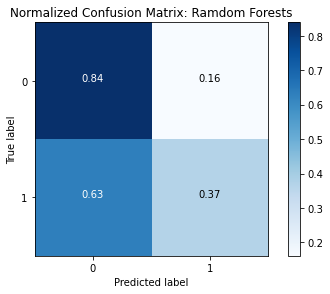

In [11]:
print('Accuracy Score is',accuracy_score(y_test, y_hat))
print(pd.DataFrame(confusion_matrix(y_test, y_hat)))

plot_confusion_matrix(confusion_matrix(y_test,y_hat),
                      classes= ['0','1'], normalize = True, 
                      title='Normalized Confusion Matrix: Ramdom Forests')